# Whatsapp Chat Analysis

In [1]:
import numpy as np
import pandas as pd
import regex
import emoji
from collections import Counter
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Extraction Functions

In [2]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

In [3]:
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

## Importing Data

In [4]:
data = []
conversation = 'WhatsApp Chat with Kaal_Naazhigai.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [5]:
chat_df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
chat_df['Date'] = pd.to_datetime(chat_df['Date'])

## Exploring Data

In [6]:
chat_df.head()

Date     Time                  Author  \
0 2020-04-06  8:03 PM                    None   
1 2021-01-01  6:47 AM       ASE Narendran EEE   
2 2021-01-01  7:45 AM  Kowsick Chandra Guptha   
3 2021-01-01  8:40 AM       ASE Narendran EEE   
4 2021-01-01  8:48 AM       ASE Narendran EEE   

                                  Message  
0                          You were added  
1   ஆங்கிலப் புத்தாண்டு நல்வாழ்த்துகள் 🥳🥳  
2                         <Media omitted>  
3           Video release pannirlaama....  
4  Thumbnail update pannuda @919566899955

In [7]:
chat_df.tail()

Date      Time             Author  \
3944 2021-10-13  10:03 PM  ASE Narendran EEE   
3945 2021-10-13  10:40 PM       Veeramanohar   
3946 2021-10-13  10:40 PM       Veeramanohar   
3947 2021-10-13  10:41 PM       Veeramanohar   
3948 2021-10-13  10:42 PM       Veeramanohar   

                                                Message  
3944                                    <Media omitted>  
3945                         andha aalu ipove MLA dhan😂  
3946                                    <Media omitted>  
3947  2 naal company la english la ye videos ah potu...  
3948                                    <Media omitted>

In [8]:
chat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3949 entries, 0 to 3948
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3949 non-null   datetime64[ns]
 1   Time     3949 non-null   object        
 2   Author   3839 non-null   object        
 3   Message  3949 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 123.5+ KB


In [9]:
authors=chat_df.Author.unique()
authors

array([None, 'ASE Narendran EEE', 'Kowsick Chandra Guptha', 'Raja Ram',
       'Veeramanohar'], dtype=object)

In [10]:
total_messages=chat_df.shape[0]
total_messages

3949

In [11]:
media_messages = chat_df[chat_df["Message"]=='<Media omitted>'].shape[0]
media_messages

802

### Extracting Emojis

In [12]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI_ENGLISH for char in word):
            emoji_list.append(word)
    return emoji_list

chat_df['emoji'] = chat_df["Message"].apply(split_count)

emojis = sum(chat_df['emoji'].str.len())
emojis

1941

In [13]:
chat_df.head(1)

Date     Time Author         Message emoji
0 2020-04-06  8:03 PM   None  You were added    []

### Extracting URLs

In [14]:
URLPATTERN = r'(https?://\S+)'
chat_df['urlcount'] = chat_df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(chat_df.urlcount)
links

103

### Stats

In [15]:
print(f'Chats between {authors[0]} and {authors[1]}')
print(f'Total Messages: {total_messages}')
print(f'Number of Media shared: {media_messages}')
print(f'Number of Emojis shared: {emojis}')
print(f'Number of Links shared: {links}')

Chats between None and ASE Narendran EEE
Total Messages: 3949
Number of Media shared: 802
Number of Emojis shared: 1941
Number of Links shared: 103


In [16]:
media_messages_df = chat_df[chat_df['Message'] == '<Media omitted>']
media_messages_df.shape[0]

802

In [17]:
messages_df = chat_df.drop(media_messages_df.index)
messages_df.shape[0]

3147

In [18]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))

In [19]:
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))

In [20]:
messages_df["MessageCount"]=1

In [21]:
messages_df.head()

Date     Time             Author  \
0 2020-04-06  8:03 PM               None   
1 2021-01-01  6:47 AM  ASE Narendran EEE   
3 2021-01-01  8:40 AM  ASE Narendran EEE   
4 2021-01-01  8:48 AM  ASE Narendran EEE   
5 2021-01-01  9:24 AM           Raja Ram   

                                  Message   emoji  urlcount  Letter_Count  \
0                          You were added      []         0            14   
1   ஆங்கிலப் புத்தாண்டு நல்வாழ்த்துகள் 🥳🥳  [🥳, 🥳]         0            37   
3           Video release pannirlaama....      []         0            29   
4  Thumbnail update pannuda @919566899955      []         0            38   
5                                      🔥🔥  [🔥, 🔥]         0             2   

   Word_Count  MessageCount  
0           3             1  
1           4             1  
3           3             1  
4           4             1  
5           1             1

In [22]:
authors_list=authors[authors!=None]
authors_list

array(['ASE Narendran EEE', 'Kowsick Chandra Guptha', 'Raja Ram',
       'Veeramanohar'], dtype=object)

In [23]:
for i in range(len(authors_list)):
    req_df= messages_df[messages_df["Author"] == authors_list[i]]
    print(f'Stats of {authors_list[i]} :')
    print(f'Messages Sent - {req_df.shape[0]}')
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print(f'Average Words per message - {words_per_message}')
    media = media_messages_df[media_messages_df['Author'] == authors_list[i]].shape[0]
    print(f'Media Messages Sent - {media}')
    emojis=sum(req_df['emoji'].str.len())
    print(f'Emojis Sent - {emojis}')
    
    total_emojis_list = list(set([a for b in req_df.emoji for a in b]))
    total_emojis = len(total_emojis_list)

    total_emojis_list = list([a for b in req_df.emoji for a in b])
    emoji_dict = dict(Counter(total_emojis_list))
    emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
    #for i in emoji_dict:
      #print(i,end=" ")
  
    emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])

    fig = px.pie(emoji_df, values='count', names='emoji')
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

Stats of ASE Narendran EEE :
Messages Sent - 398
Average Words per message - 4.266331658291457
Media Messages Sent - 99
Emojis Sent - 422


Stats of Kowsick Chandra Guptha :
Messages Sent - 734
Average Words per message - 4.822888283378747
Media Messages Sent - 37
Emojis Sent - 358


Stats of Raja Ram :
Messages Sent - 1167
Average Words per message - 5.1139674378748925
Media Messages Sent - 223
Emojis Sent - 842


Stats of Veeramanohar :
Messages Sent - 738
Average Words per message - 7.150406504065041
Media Messages Sent - 443
Emojis Sent - 295


In [24]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i,end=" ")
  
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])

fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

('😂', 900) ('🤣', 201) ('🥲', 164) ('🔥', 140) ('😅', 52) ('😒', 42) ('🥳', 32) ('😌', 27) ('🙄', 21) ('👏', 20) ('🥺', 18) ('💥', 17) ('😑', 16) ('😭', 16) ('👌', 16) ('🤷\u200d♂️', 15) ('🙂', 13) ('🙏', 13) ('💛', 13) ('😳', 11) ('🤦\u200d♂️', 11) ('😁', 10) ('😱', 9) ('😏', 8) ('🤔', 7) ('😆', 7) ('😐', 7) ('🙇\u200d♂️', 6) ('🏳️', 6) ('🙌🏻', 5) ('⚠️', 5) ('🤦🏻\u200d♂️', 5) ('😍', 4) ('😎', 4) ('👍', 4) ('😵', 3) ('🥛', 3) ('🙏🏼', 3) ('🐥', 3) ('🌚', 3) ('🌸', 3) ('💦', 3) ('🍦', 3) ('💔', 3) ('🤷🏻\u200d♂️', 2) ('🧐', 2) ('🤐', 2) ('😶', 2) ('🤕', 2) ('😔', 2) ('🐄', 2) ('😨', 2) ('🤭', 2) ('🍉', 2) ('🤒', 2) ('💯', 2) ('🤓', 2) ('😲', 2) ('🦧', 2) ('❤\u200d🔥', 2) ('👆', 2) ('💐', 2) ('🤩', 2) ('😬', 2) ('❤️\u200d🔥', 2) ('👍🏻', 1) ('👌🏻', 1) ('😜', 1) ('🤢', 1) ('🍻', 1) ('🙃', 1) ('😪', 1) ('✌🏻', 1) ('✨', 1) ('🐐', 1) ('🐮', 1) ('🐒', 1) ('🫀', 1) ('😝', 1) ('💎', 1) ('👨\u200d🍼', 1) ('🎖', 1) ('👀', 1) ('🚵\u200d♀️', 1) ('🙋\u200d♂️', 1) ('✊', 1) ('😯', 1) ('❤', 1) ('💙', 1) ('💚', 1) ('💩', 1) ('❤️', 1) 

There are 114576 words in all the messages.


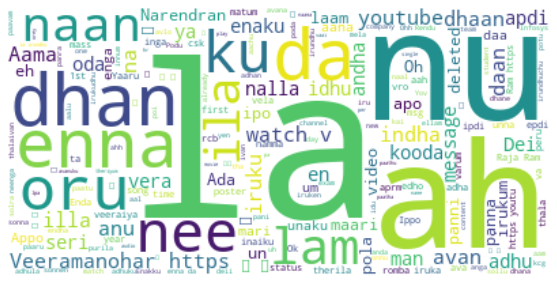

In [25]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name ASE Narendran EEE


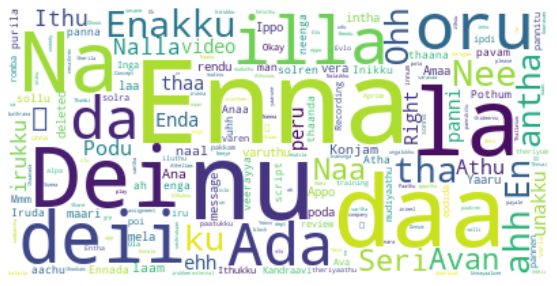

Author name Kowsick Chandra Guptha


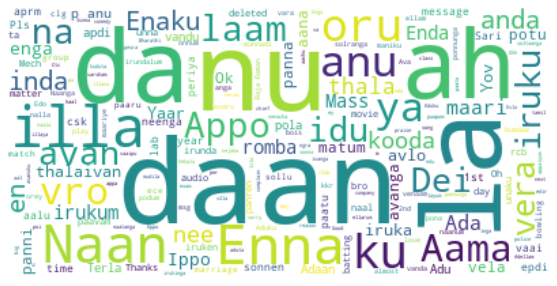

Author name Raja Ram


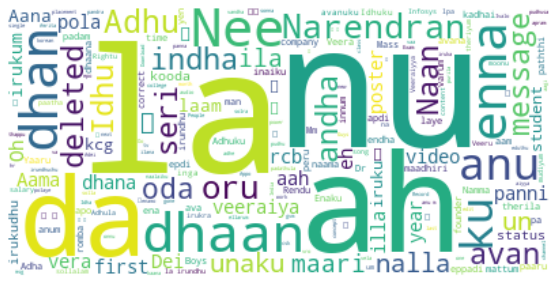

Author name Veeramanohar


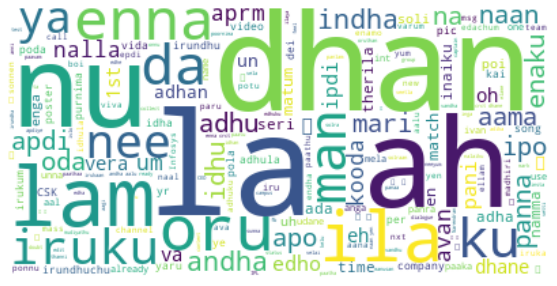

In [26]:
for i in range(len(authors_list)):
  dummy_df = messages_df[messages_df['Author'] == authors_list[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',authors_list[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()